# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

50000/50000 [==============================] - 2s 43us/step - loss: 1.5051 - acc: 0.4656 - val_loss: 1.6886 - val_acc: 0.4005
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5032 - acc: 0.4677 - val_loss: 1.7684 - val_acc: 0.4013
Epoch 50/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5001 - acc: 0.4713 - val_loss: 1.6570 - val_acc: 0.4337
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)

Epoch 50/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.3853 - acc: 0.8606 - val_loss: 2.2468 - val_acc: 0.5159
Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.2617 - acc: 0.1736 - val_loss: 2.1853 - val_acc: 0.2301
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1386 - acc: 0.2542 - val_loss: 2.0906 - val_acc: 0.2693
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.0529 - acc: 0.2848 - val_loss: 2.0179 - val_acc: 0.2974
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9915 - acc: 0.3060 - val_loss: 1.9683 - val_acc: 0.3100
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9484 - acc: 0.3196 - val_loss: 1.9323 - val_acc: 0.3207
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9154 - acc: 0.3300 - val_loss: 1.9027 - val_acc: 0.3357
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.8890 - acc: 0.3391 - val_loss: 1.8799 - val_acc

50000/50000 [==============================] - 2s 41us/step - loss: 2.2794 - acc: 0.1626 - val_loss: 2.2644 - val_acc: 0.1710
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2537 - acc: 0.1784 - val_loss: 2.2430 - val_acc: 0.1860
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.2345 - acc: 0.1913 - val_loss: 2.2251 - val_acc: 0.1988
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.2174 - acc: 0.2033 - val_loss: 2.2088 - val_acc: 0.2108
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2015 - acc: 0.2153 - val_loss: 2.1934 - val_acc: 0.2234
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1864 - acc: 0.2259 - val_loss: 2.1789 - val_acc: 0.2322
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1722 - acc: 0.2327 - val_loss: 2.1652 - val_acc: 0.2402
Epoch 9/50
50000/50000 [============================

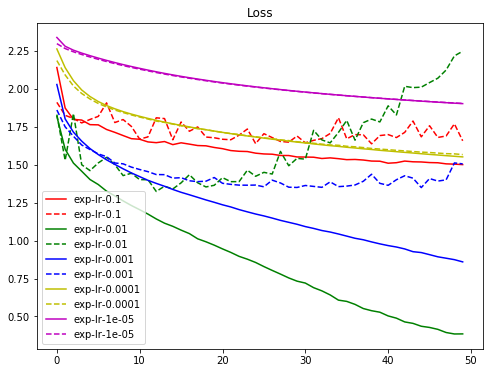

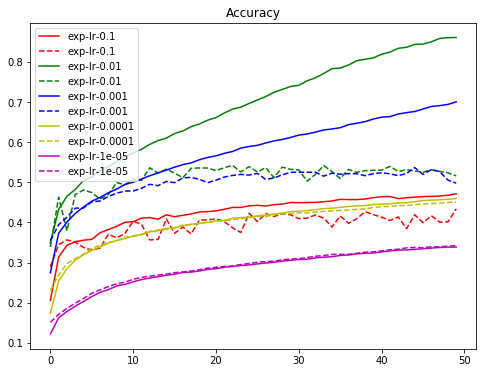

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.4410 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 51us/step - loss: 1.9555 - acc: 0.2969 - val_loss: 1.8327 - val_acc: 0.3518
Epoch 2/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7304 - acc: 0.3823 - val_loss: 1.6447 - val_acc: 0.4159
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6506 - acc: 0.4109 - val_loss: 1.5956 - val_acc: 0.4358
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5700 - acc: 0.4415 - val_loss: 1.5529 - val_acc: 0.4506
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5170 - acc: 0.4623 - val_loss: 1.4927 - val_acc: 0.4725
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4822 - acc: 0.4711 - val_loss: 1.4871 - val_acc: 0.4761
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4527 - acc: 0.4808 - val_loss: 1.4858 - val_acc: 0.4723
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6382 - acc: 0.4243 - val_loss: 1.6242 - val_acc: 0.4315
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5847 - acc: 0.4418 - val_loss: 1.5626 - val_acc: 0.4489
Epoch 5/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5396 - acc: 0.4588 - val_loss: 1.5244 - val_acc: 0.4639
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5065 - acc: 0.4702 - val_loss: 1.5012 - val_acc: 0.4690
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4733 - acc: 0.4815 - val_loss: 1.5032 - val_acc: 0.4701
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4412 - acc: 0.4933 - val_loss: 1.4855 - val_acc: 0.4690
Epoch 9/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4173 - acc: 0.5023 - val_loss: 1.4459 - val_acc: 0.4921
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 44us/step - loss: 1.8121 - acc: 0.3650 - val_loss: 1.7916 - val_acc: 0.3780
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7767 - acc: 0.3797 - val_loss: 1.7643 - val_acc: 0.3834
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7485 - acc: 0.3912 - val_loss: 1.7361 - val_acc: 0.3959
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7229 - acc: 0.4001 - val_loss: 1.7168 - val_acc: 0.4024
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7014 - acc: 0.4080 - val_loss: 1.6959 - val_acc: 0.4117
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6828 - acc: 0.4145 - val_loss: 1.6769 - val_acc: 0.4182
Epoch 10/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6640 - acc: 0.4226 - val_loss: 1.6626 - val_acc: 0.4249
Epoch 11/50
50000/50000 [==========================

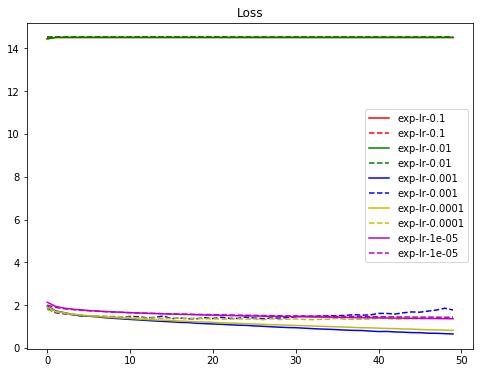

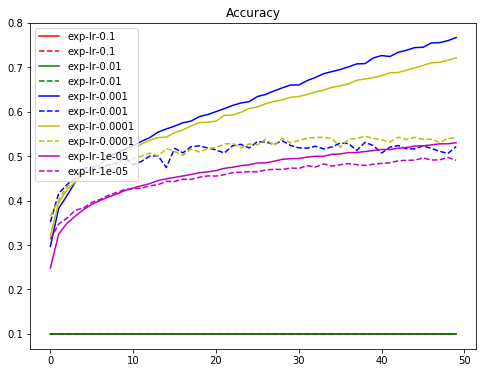

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr,epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.4471 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 51us/step - loss: 2.2896 - acc: 0.2135 - val_loss: 1.9624 - val_acc: 0.2647
Epoch 2/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.8954 - acc: 0.3148 - val_loss: 1.9965 - val_acc: 0.2947
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7982 - acc: 0.3559 - val_loss: 1.7450 - val_acc: 0.3760
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7150 - acc: 0.3835 - val_loss: 1.7893 - val_acc: 0.3357
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6556 - acc: 0.4059 - val_loss: 1.6601 - val_acc: 0.4059
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6131 - acc: 0.4217 - val_loss: 1.6009 - val_acc: 0.4211
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5679 - acc: 0.4380 - val_loss: 1.7925 - val_acc: 0.3702
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7174 - acc: 0.3924 - val_loss: 1.7187 - val_acc: 0.3768
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6604 - acc: 0.4119 - val_loss: 1.7606 - val_acc: 0.3648
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6186 - acc: 0.4280 - val_loss: 1.6049 - val_acc: 0.4343
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5844 - acc: 0.4421 - val_loss: 1.6532 - val_acc: 0.4075
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5534 - acc: 0.4504 - val_loss: 1.5871 - val_acc: 0.4274
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5228 - acc: 0.4626 - val_loss: 1.5787 - val_acc: 0.4348
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5000 - acc: 0.4712 - val_loss: 1.5295 - val_acc: 0.4580
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 48us/step - loss: 1.8356 - acc: 0.3617 - val_loss: 1.8270 - val_acc: 0.3600
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8005 - acc: 0.3736 - val_loss: 1.7948 - val_acc: 0.3711
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7717 - acc: 0.3846 - val_loss: 1.7705 - val_acc: 0.3805
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7482 - acc: 0.3907 - val_loss: 1.7396 - val_acc: 0.3904
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7270 - acc: 0.3984 - val_loss: 1.7305 - val_acc: 0.3979
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7081 - acc: 0.4056 - val_loss: 1.7172 - val_acc: 0.3939
Epoch 10/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6907 - acc: 0.4106 - val_loss: 1.6888 - val_acc: 0.4077
Epoch 11/50
50000/50000 [==========================

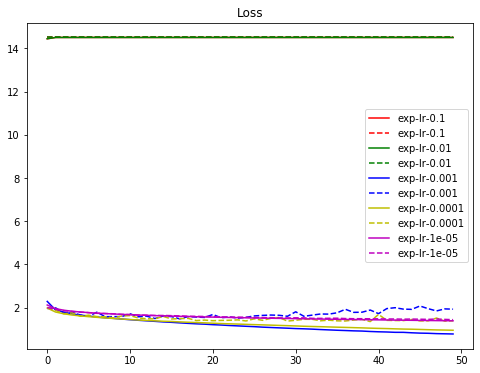

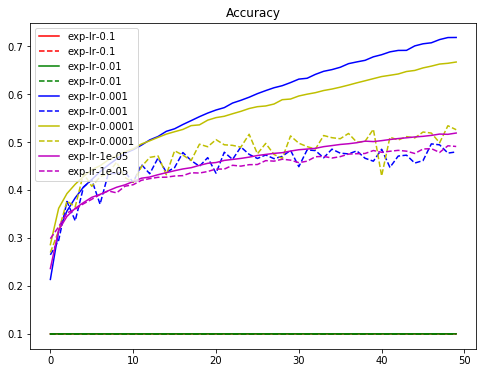

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [13]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.4396 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 53us/step - loss: 2.0090 - acc: 0.2786 - val_loss: 1.8661 - val_acc: 0.3278
Epoch 2/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8148 - acc: 0.3593 - val_loss: 1.7776 - val_acc: 0.3728
Epoch 3/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7453 - acc: 0.3850 - val_loss: 1.7455 - val_acc: 0.3704
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6952 - acc: 0.4025 - val_loss: 1.7230 - val_acc: 0.3862
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6590 - acc: 0.4164 - val_loss: 1.7753 - val_acc: 0.3704
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.6308 - acc: 0.4266 - val_loss: 1.6258 - val_acc: 0.4301
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6068 - acc: 0.4345 - val_loss: 1.6201 - val_acc: 0.4292
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 49us/step - loss: 1.9421 - acc: 0.3243 - val_loss: 1.9153 - val_acc: 0.3295
Epoch 3/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8969 - acc: 0.3417 - val_loss: 1.8815 - val_acc: 0.3466
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8675 - acc: 0.3528 - val_loss: 1.8599 - val_acc: 0.3487
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8462 - acc: 0.3603 - val_loss: 1.8407 - val_acc: 0.3544
Epoch 6/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.8293 - acc: 0.3672 - val_loss: 1.8266 - val_acc: 0.3634
Epoch 7/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.8161 - acc: 0.3714 - val_loss: 1.8138 - val_acc: 0.3684
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8046 - acc: 0.3750 - val_loss: 1.8043 - val_acc: 0.3719
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1961 - acc: 0.2246 - val_loss: 2.1902 - val_acc: 0.2270
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1837 - acc: 0.2359 - val_loss: 2.1788 - val_acc: 0.2348
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1729 - acc: 0.2412 - val_loss: 2.1688 - val_acc: 0.2390
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1634 - acc: 0.2452 - val_loss: 2.1598 - val_acc: 0.2434
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1547 - acc: 0.2481 - val_loss: 2.1517 - val_acc: 0.2480
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1468 - acc: 0.2529 - val_loss: 2.1442 - val_acc: 0.2502
Epoch 10/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.1395 - acc: 0.2560 - val_loss: 2.1372 - val_acc: 0.2534
Epoch 11/50
50000/50000 [===============

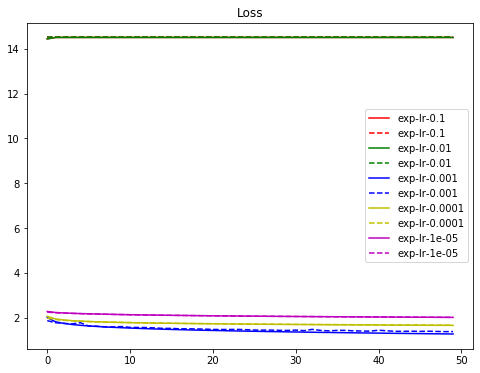

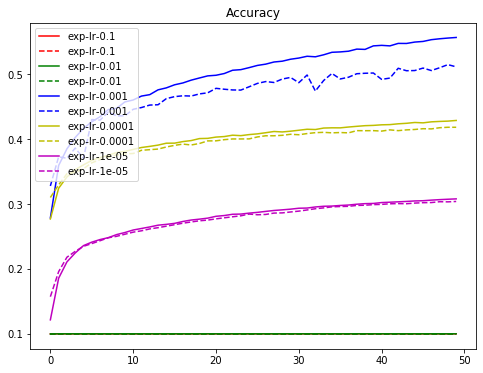

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()